# LINEAR SVM

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy
from sklearn.metrics import confusion_matrix 

  
data=pd.read_csv('iris.csv')
print(data.head())

X=data[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y=data[['Name']]

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state = 4) 
  
# training a linear SVM classifier 
from sklearn import svm 
#svm_model_linear = SVC(kernel='linear', C = 1).fit(X_train, y_train) 
svm_model_linear = svm.LinearSVC(C = 1).fit(X_train, y_train) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)

svm_predictions=svm_model_linear.predict(X_test) 

# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
0.933333333333
[[21  0  0]
 [ 0  8  2]
 [ 0  1 13]]


In [60]:
print(svm_model_linear)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


# KNN 

In [61]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
sns.set()
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import cross_val_score
from sklearn import metrics # for the check the error and accuracy
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import operator
import statistics

  

data=pd.read_csv('iris.csv')
print(data.head())
X=data[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y=data[['Name']]
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state = 4) 
  
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy)
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

X_t=[[5.3,3.3,1.2,.3]]
print(knn.predict(X_t))



   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
0.977777777778
['Iris-setosa']


# C value selection using iteration


1. Import necessary python packages
2. Load iris dataset
3. Initialize the C parameter value
4. For each value of C do the following
• Find training and testing accuracy
• Find cross validation accuracy 50 times • Find the mean value in each iteration
• Find the mean accuracy
• Update C value
5. Find the C value which produces the highest accuracy
6. Plot the log(C) values and obtained accuracy in each C value 7. Plot the training and testing accuracies

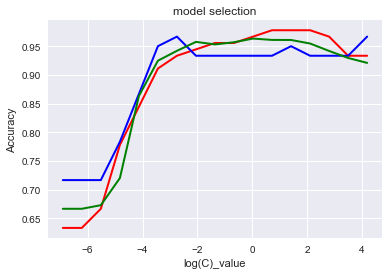

Selected value for C 1.024
--- 124.44891905784607 seconds ---


In [23]:
import time
start_time = time.time()

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import math
import warnings
warnings.filterwarnings('ignore')

iris=pd.read_csv('iris.csv')
X=iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y=iris[['Name']]

c_value=.001
accuracy_dict={}
cvalue_list=[]
accuracy_list=[]
training_accuracy_list=[]
testing_accuracy_list=[]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.4,random_state = 4)

while(c_value<100):
    clf=svm.LinearSVC(C=c_value)
    train_accuracy=clf.fit(X_train,y_train).score(X_train,y_train)
    training_accuracy_list.append(train_accuracy)
    
    test_accuracy=clf.fit(X_train,y_train).score(X_test,y_test)
    testing_accuracy_list.append(test_accuracy)
    
    score_list=[]
    for cv_value in range(2,51):
        scores=cross_val_score(clf,X,y, cv=cv_value)
        score_list.append(scores.mean())
    cvalue_list.append(c_value)
    accuracy_list.append(statistics.mean(score_list))
    accuracy_dict[c_value]=statistics.mean(score_list)
    c_value=c_value*2

Cmax=max(accuracy_dict.items(),key=operator.itemgetter(1))[0]
plt.xlabel("log(C)_value")
plt.ylabel("Accuracy")
plt.title("model selection")
cvalue_list_log=[math.log(c_item) for c_item in cvalue_list]

plt.plot(cvalue_list_log, training_accuracy_list, color='red', linestyle='solid', linewidth=2, markersize=.5)
plt.plot(cvalue_list_log, testing_accuracy_list, color='blue', linestyle='solid', linewidth=2, markersize=.5)
plt.plot(cvalue_list_log, accuracy_list, color='green', linestyle='solid', linewidth=2, markersize=.5)

plt.show()
print('Selected value for C',Cmax)

print("--- %s seconds ---" % (time.time() - start_time))

# USING SELECTED C VALUE IN SVM

In [38]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1.024).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)

0.983333333333
[[25  0  0]
 [ 0 16  1]
 [ 0  0 18]]


# Naive bayes (Gaussian) on IRIS

In [62]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
# loading the iris dataset 
iris = datasets.load_iris() 
  
# X -> features, y -> label 
X = iris.data 
y = iris.target 
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4) 
  
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 
print(cm)

0.973684210526
[[18  0  0]
 [ 0  8  0]
 [ 0  1 11]]


# Decison Tree on IRIS

[[15  0  0]
 [ 0 12  3]
 [ 0  2 13]]
0.888888888889


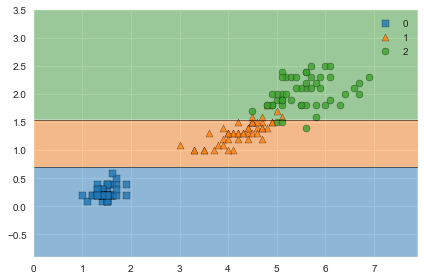

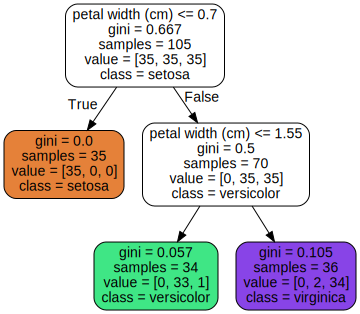

In [63]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn import tree
  
# loading the iris dataset 
iris = datasets.load_iris() 
  
# X -> features, y -> label 
X = iris.data[:,[2,3]] 
y = iris.target 
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3, random_state = 42,stratify=y) 
  
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
print(cm)

accuracy = dtree_model.score(X_test, y_test) 
print (accuracy) 

X_comb=np.vstack((X_train,X_test))
y_comb=np.hstack((y_train,y_test))
plot_decision_regions(X_comb,y_comb,clf=dtree_model)
plt.tight_layout()
plt.show()

import graphviz 
dot_data = tree.export_graphviz(dtree_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")
dot_data = tree.export_graphviz(dtree_model, out_file=None, 
                     feature_names=iris.feature_names[2:],  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                    )  
graph = graphviz.Source(dot_data)  
graph 


# SVM Regression on boston data

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


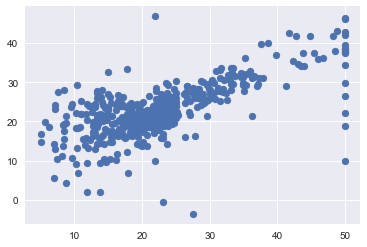

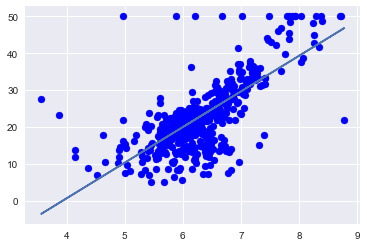

[[ 9.65853746]]
[-37.98700787]
[-37.98700787]  +  [[ 9.65853746]] X
Anova Score 0.481332273679


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

boston=pd.read_csv('boston.csv')
print(boston.head())



X_rooms=boston['RM'].values
y=boston['MEDV'].values


y=y.reshape(-1,1)
X_rooms=X_rooms.reshape(-1,1)

#plt.scatter(X_rooms,y)
#plt.show()


svr_rbf=SVR(kernel='linear',C=10)
svr_rbf.fit(X_rooms,y)

plt.scatter(y,svr_rbf.predict(X_rooms))
plt.show()

plt.scatter(X_rooms,y,color='blue')
plt.plot(X_rooms,svr_rbf.predict(X_rooms))

plt.show()

print(svr_rbf.coef_)
print(svr_rbf.intercept_)


print(svr_rbf.intercept_," + ",svr_rbf.coef_,"X")

score=svr_rbf.score(X_rooms,y)
print("Anova Score",score)

# REGRESSION USING DECISION TREE

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

boston=pd.read_csv('boston.csv')
print(boston.head())



X_rooms=boston['RM'].values
y=boston['MEDV'].values


y=y.reshape(-1,1)
X_rooms=X_rooms.reshape(-1,1)

#plt.scatter(X_rooms,y)
#plt.show()


tree=DecisionTreeRegressor(max_depth=15)
tree.fit(X_rooms,y)







score=tree.score(X_rooms,y)
print("Anova Score",score)

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Anova Score 0.918798270533
